Links:
- https://surprise.readthedocs.io/en/stable/getting_started.html
- https://surpriselib.com/


Inspiration:
- https://github.com/divensambhwani/MovieLens-100K_Recommender-System/blob/master/MovieLens-100K-Recommeder%20System-SVD.ipynb


State of the art:
- https://paperswithcode.com/sota/collaborative-filtering-on-movielens-100k


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os  
import IPython
import sys

from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

from surprise import accuracy
from surprise import Dataset
from surprise import Reader

from collections import defaultdict


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
"""
Load dataset
"""
datasetNameRating = "ml-latest-small/ratings.csv"
datasetNameMovies = "ml-latest-small/movies.csv"


# Load the dataset (download it if needed)
#data = Dataset.load_builtin('ml-100k')
data = pd.read_csv(datasetNameRating, sep=',', encoding='latin-1', usecols=[0,1,2,3], names=['user_id', 'item_id', 'rating', 'timestamp'], header=0)

# Convert to pandas dataframe
#df = pd.DataFrame(data.__dict__['raw_ratings'], columns=['user_id','item_id','rating','timestamp'])
ratings_df = pd.DataFrame(data, columns=['user_id','item_id','rating', 'timestamp'])
movies_df = pd.read_csv(datasetNameMovies)

#print data from first 10 rows
display(df.head())
print(df.shape)

#create an reader -> iterate through data
reader = Reader(line_format='user item rating timestamp', sep='\t', rating_scale=(0.5, 5))
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader=reader)


NameError: name 'df' is not defined

Number of ratings:
 4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


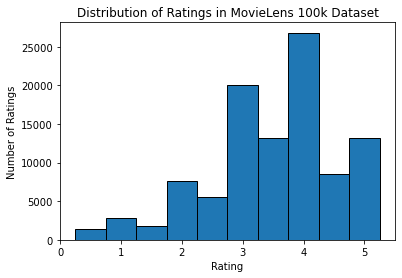

In [ ]:
"""
Exploratory Data Analysis (EDA) 
"""
rating_counts = ratings_df['rating'].value_counts()
print("Number of ratings:\n", rating_counts) 

plt.hist(ratings_df['rating'], bins=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5], edgecolor='black', align="left")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Ratings in MovieLens 100k Dataset")
plt.show()



In [ ]:
"""
Comparing RMSE for different algorithms using cross-validation
"""
benchmark = []

#iterate over all algorithms
for algorithm in [SVD(), NMF(), NormalPredictor(), KNNBasic()]:
    #perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)

    #get results and append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

#printing results 
results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
display(results)

C:\Users\basti\AppData\Local\Temp\ipykernel_2620\826808361.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\basti\AppData\Local\Temp\ipykernel_2620\826808361.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\basti\AppData\Local\Temp\ipykernel_2620\826808361.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\basti\AppData\Local\Temp\ipykernel_2620\826808361.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.874546,0.879942,0.137810
NMF,0.924603,1.630614,0.115750
KNNBasic,0.946933,0.163602,1.184398
NormalPredictor,1.430230,0.109783,0.130211


In [ ]:
"""
Training and testing 
"""
#create trainset and testset
trainset, testset = train_test_split(data, test_size=.25)

#defines algorithms (probably try to tune parameters later , otherwise mention it in the report)
algo1 = SVD() #SVD(n_factors=factors, n_epochs=epochs, lr_all=lr_value, reg_all=reg_value) -> look at parameters
algo2 = NMF()
algo3 = NormalPredictor()
algo4 = KNNBasic()

#train and test algorithms
svd_predictions = algo1.fit(trainset).test(testset)
nmf_predictions = algo2.fit(trainset).test(testset)
normal_predictions = algo3.fit(trainset).test(testset)
knn_predictions = algo4.fit(trainset).test(testset)

#print answers
accuracy.rmse(svd_predictions)
accuracy.mae(svd_predictions)
accuracy.rmse(nmf_predictions)
accuracy.mae(nmf_predictions)
accuracy.rmse(normal_predictions)
accuracy.mae(normal_predictions)
accuracy.rmse(knn_predictions)
accuracy.mae(knn_predictions)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8742
MAE:  0.6732
RMSE: 0.9221
MAE:  0.7071
RMSE: 1.4306
MAE:  1.1431
RMSE: 0.9440
MAE:  0.7232


0.7231981382258879

In [ ]:
"""
Training the model on dataset but using new movies 
"""

trainset = data.build_full_trainset()
new_algo_svd = SVD()
#new_algo_nmf = NMF()
#new_algo_normal = NormalPredictor()
#new_algo_knn = KNNBasic()

#predict ratings for all pairs (u, i) that are NOT in the training set
testset = trainset.build_anti_testset() #antitest is used to use movies not present in the testset when testing

#predicting the ratings 
predicSVD = new_algo_svd.fit(trainset).test(testset)
#predicNMF = new_algo_nmf.fit(trainset).test(testset)
#predicNP = new_algo_normal.fit(trainset).test(testset)
#predicKNN = new_algo_knn.fit(trainset).test(testset)

#look at format

# Calculate the RMSE
accuracy.rmse(predicSVD)

# Calculate the MAE
accuracy.mae(predicSVD)



RMSE: 0.4858
MAE:  0.3768


0.376839577454954

In [ ]:
"""
Prediction functions 
"""
def get_all_predictions(predictions):
    
    #first map the predictions to each user.
    top_n = defaultdict(list)       #defaultdict is a dictionary that has a default value for keys that have not been set yet
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n


def get_predictions(user_id):
    return tmp_transpose.iloc[user_id]


"""
Get top recommended movies for an user
"""
all_predictions = get_all_predictions(predicSVD)      #get recommendations for all users
n = 100                                                   #number of movies to recommend


#sort the predictions for each user and retrieve the n highest ones
for uid, user_ratings in all_predictions.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_predictions[uid] = user_ratings[:n]

#convert to dataframe
tmp = pd.DataFrame.from_dict(all_predictions)
tmp_transpose = tmp.transpose()

#get recommendations for user 30 (format: movie_id, predicted rating)
user_id = 123

results = get_predictions(user_id)
print(results)

0       (778, 4.607866771150512)
1      (1262, 4.582472858479372)
2      (1178, 4.582192275207375)
3       (908, 4.574751269469999)
4      (2324, 4.562075942737972)
                 ...            
95     (56367, 4.29718307495955)
96      (954, 4.297032278833739)
97     (1104, 4.296989513186938)
98    (31658, 4.295491600168083)
99    (58301, 4.295263443848331)
Name: 124, Length: 100, dtype: object


In [ ]:
"""
Retrieve recommended movie details i.e title and genre from the ids
"""
#movie_data.drop(columns=['video_release_date', 'IMDb_URL'], inplace=True)   #not used in dataset 


#retrieve movie ids 
recommended_movies_ids = []

for x in range (0, n):
    recommended_movies_ids.append(results[x][0])


#retrieve recommended movie + details
recommended_movies = movies_df[movies_df['movieId'].isin(recommended_movies_ids)]
display(recommended_movies)

genre_counts = recommended_movies["genres"].str.split("|", expand=True).stack().reset_index(level=1, drop=True).rename("genre").value_counts()
print(genre_counts)




,movieId,title,genres
135,162,Crumb (1994),Documentary
210,246,Hoop Dreams (1994),Documentary
413,475,In the Name of the Father (1993),Drama
585,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy
596,741,Ghost in the Shell (Kôkaku kidôtai) (1995),Animation|Sci-Fi
...,...,...,...
8043,98491,Paperman (2012),Animation|Comedy|Romance
8305,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
8312,106918,"Secret Life of Walter Mitty, The (2013)",Adventure|Comedy|Drama
8451,112175,How to Train Your Dragon 2 (2014),Action|Adventure|Animation


Drama          59
Comedy         33
Thriller       27
Adventure      25
Crime          25
Action         25
Romance        19
War            14
Mystery        12
Fantasy        10
Animation      10
Sci-Fi          9
Children        5
IMAX            5
Film-Noir       5
Western         3
Documentary     3
Horror          1
Name: genre, dtype: int64


In [ ]:
"""
Look at user data to see if recommended movies are in line with user preferences
"""
#looking at previous ratings of specific user
ratings_df[df['user_id'] == user_id]
user_details = df[(ratings_df["rating"] >= 4.0) & (df["rating"] <= 5.0)].sort_values('rating', ascending=False)

#display(user_details)

#looking at the previous movies details rated by the user
history_movie_ids = user_details['item_id']
history_movies = movies_df[movies_df['movieId'].isin(history_movie_ids)]

#display(history_movies)        #display all movies rated by the user
display(history_movies)     #display only top movies rated by the user 

genre_counts = history_movies["genres"].str.split("|", expand=True).stack().reset_index(level=1, drop=True).rename("genre").value_counts()
print(genre_counts)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
9731,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi
9734,193571,Silver Spoon (2014),Comedy|Drama
9735,193573,Love Live! The School Idol Movie (2015),Animation
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy


Drama                 2998
Comedy                2402
Thriller              1220
Action                1216
Romance               1118
Adventure              888
Crime                  801
Sci-Fi                 655
Fantasy                521
Horror                 495
Animation              437
Children               437
Mystery                387
Documentary            310
War                    287
Musical                217
IMAX                   133
Western                109
Film-Noir               62
(no genres listed)      18
Name: genre, dtype: int64


In [ ]:

"""Code for genres that dosent work"""
# Load data
ratings = pd.read_csv(datasetNameRating)

# Load movie data
movies = pd.read_csv(datasetNameMovies)
movie_genres = movies.drop(['title'], axis=1)

# Merge movie genres data with ratings data
ratings = pd.merge(ratings, movie_genres, on='movieId')
ratings = ratings.drop(['timestamp'], axis=1)
print(ratings)

# Define the Reader object
reader = Reader(rating_scale=(0.5, 5), line_format='user item rating genres', sep=' ')

# Load the data into the Surprise Dataset object
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating','genres']], reader)

# Define the algorithms to use
algorithm_list = [SVD(), NMF(), KNNBasic(), NormalPredictor()]

# Run 5-fold cross-validation for each algorithm
for algorithm in algorithm_list:
    tmp = pd.DataFrame()
    tmp = tmp.append(pd.Series(cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)).rename(str(algorithm).split(' ')[0].split('.')[-1]))
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']), ignore_index=True)
    print(tmp)

# Use SVD algorithm to train the model on the whole dataset
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Get top 100 movie recommendations for user with ID 124
user_id = str(124)
user_movies = ratings[ratings['userId'] == user_id]['movieId']
user_unrated_movies = movies[~movies['movieId'].isin(user_movies)]['movieId']
user_unrated_movies = [(user_id, movie_id, 0) for movie_id in user_unrated_movies]
user_recommendations = algo.test(user_unrated_movies)
user_recommendations = sorted(user_recommendations, key=lambda x: x.est, reverse=True)[:100]
print(pd.Series([(movies.loc[movies['movieId'] == int(pred.iid), 'title'].values[0], pred.est) for pred in user_recommendations]))



        userId  movieId  rating   timestamp  \
0            1        1     4.0   964982703   
1            5        1     4.0   847434962   
2            7        1     4.5  1106635946   
3           15        1     2.5  1510577970   
4           17        1     4.5  1305696483   
...        ...      ...     ...         ...   
100831     610   160341     2.5  1479545749   
100832     610   160527     4.5  1479544998   
100833     610   160836     3.0  1493844794   
100834     610   163937     3.5  1493848789   
100835     610   163981     3.5  1493850155   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1       Adventure|Animation|Children|Comedy|Fantasy  
2       Adventure|Animation|Children|Comedy|Fantasy  
3       Adventure|Animation|Children|Comedy|Fantasy  
4       Adventure|Animation|Children|Comedy|Fantasy  
...                                             ...  
100831                              Action|Thriller  
100

ValueError: line_format parameter is incorrect.